In [1]:
import numpy as np
import gym
import gym_ple
import tensorflow as tf
slim = tf.contrib.slim
tf.ph = tf.placeholder

import matplotlib.pyplot as plt
%matplotlib inline

couldn't import doomish
Couldn't import doom


In [2]:
# env = envs.create_atari_env('WaterWorld-v0')
env = gym.make('WaterWorld-v0')

[2017-09-23 15:15:12,132] Making new env: WaterWorld-v0


WaterWorld


In [76]:
def rollout(env, policy, show=False, debug=False):
    observations = []
    actions = []
    rewards = []
    s = env.reset()
    done = False
    while not done:
        observations.append(s)
        a, a_p = policy(s)
        actions.append(a)
        s, r, done, _ = env.step(a)
        rewards.append(r)
        if show:
            print('Action=%s, Reward=%s' % (a, round(r, 2)))
        if debug:
            import pdb; pdb.set_trace()
    observations = np.array(observations) / 255.
    return [np.array(x) for x in (observations, actions, rewards)]

In [77]:
S, A, R = rollout(env, lambda _: [env.action_space.sample(), _], show=0)

Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=0.99
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=4, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=4, Reward=-0.01
Action=0, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Re

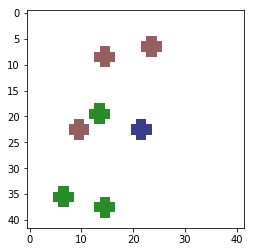

In [78]:
plt.imshow(S[2])

In [79]:
sess = tf.Session()

In [80]:
s_in = tf.ph(dtype='float32', shape=[None, 42, 42, 3])
a_in = tf.ph(dtype='int32', shape=[None])
r_in = tf.ph(dtype='float32', shape=[None])

In [104]:
hc = slim.conv2d(s_in, num_outputs=16, kernel_size=[3, 3], stride=[2, 2])
hc = slim.batch_norm(hc)
# hc = slim.conv2d(hc, num_outputs=16, kernel_size=[3, 3], stride=[2, 2])
# hc = slim.batch_norm(hc)
# hc = slim.conv2d(hc, num_outputs=16, kernel_size=[3, 3], stride=[2, 2])
# hc = slim.batch_norm(hc)
h = tf.reduce_mean(hc, -1)
h = slim.flatten(h)

logits = slim.fully_connected(h, num_outputs=env.action_space.n)

action_distribution = tf.contrib.distributions.Categorical(logits=logits)
score_function = action_distribution.log_prob(a_in)
pg_target = score_function * r_in

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    train_op = tf.train.RMSPropOptimizer(0.1).minimize(-pg_target)

In [105]:
sess.run(tf.global_variables_initializer())

In [106]:
def compute_returns(R, gamma=0.99):
    R_t = [R[-1]]
    for r in reversed(R[:-1]):
        R_t.append(gamma * r + R_t[-1])
    R_t = np.array(R_t)[::-1]
    return R_t

In [107]:
def policy(s):
    a, a_p = sess.run([action_distribution.sample(), logits], {s_in: s[None]})
    return a[0], a_p[0]

In [108]:
for it in range(10000):
    print('Iteration %s' % it)
    policy(S[1])
    S, A, R = rollout(env, policy, show=0, debug=0)
    print(round(sum(R), 2))
    for s, a, r in zip(S, A, R):
        sess.run(opt, {s_in: s[None], a_in: a[None], r_in: r[None]})

Iteration 0
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-1.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=2, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-1.01
Action=3, Reward=-0.01
Action=0, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=3, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=4, Reward=-0.01
Action=4, Reward=-0.01

Action=4, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-1.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-1.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=2, Reward=-0.01
Action=3, R

Action=4, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=2, Reward=-0.01
Action=2, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-0.01
Action=2, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=0, Reward=-0.01
Action=0, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=2, Reward=-0.01
Action=1, Reward=-0.01
Action=3, Reward=-0.01
Action=3, Reward=-0.01
Action=4, Reward=-0.01
Action=1, Reward=-0.01
Action=3, R

KeyboardInterrupt: 

In [ ]:
c

In [ ]:
x = sess.run(h3, {screen_input: S[2][None]})
x.shape

In [ ]:
np.prod(x.shape)

In [ ]:
plt.imshow(x[0, :, :, 0])

In [ ]:
class AtariRescale42x42(vectorized.ObservationWrapper):
    def __init__(self, env=None):
        super(AtariRescale42x42, self).__init__(env)
        self.observation_space = Box(0.0, 1.0, [42, 42, 1])

    def _observation(self, observation_n):
        return [_process_frame42(observation) for observation in observation_n]
    
def DiagnosticsInfo(env, *args, **kwargs):
    return vectorized.VectorizeFilter(env, DiagnosticsInfoI, *args, **kwargs)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
from scipy.signal import convolve2d

In [ ]:
env = gym.make('WaterWorld-v0')

env = Vectorize(env)
env = AtariRescale42x42(env)
# env = DiagnosticsInfo(env)
env = Unvectorize(env)

In [ ]:
s = env.reset()
plt.figure(figsize=(20, 14))
plt.imshow(s)

In [ ]:
done = False
while not done:
    s, r, done, _ = env.step(np.random.choice(env.action_space.n))
    env.render()
    # s, r, done, _ = env.step(1)
#     plt.imshow(s); plt.show()
    print(r, done)

In [ ]:
done

In [ ]:
plt.imshow(s)

In [ ]:
def rollout():
    done = False
    R = 0
    env.seed = 1
    env.reset()
    np.random.seed(1)
    k = 0
    while not done:
        np.random.seed(1)
        _, r, done, _ = env.step(np.random.choice(env.action_space.n))
        R += r
        k += 1
    return R, k

In [ ]:
results = []
for _ in range(10):
    results.append(rollout())

In [ ]:
plt.scatter(*np.array(results).T, s=200, alpha=0.5)

In [ ]:
plt.scatter(*np.array(results).T, s=200, alpha=0.5)